In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from NeuralNetwork import Neural_Network
from NeuralNetworkBias import Neural_Network_Bias

def encode_labels(labels):
    # encode 'Adelie' as 1, 'Chinstrap' as 2, 'Gentoo' as 3
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    # don't worry about this
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

    # encode 1 as [1, 0, 0], 2 as [0, 1, 0], and 3 as [0, 0, 1] (to fit with our network outputs!)
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    return label_encoder, integer_encoded, onehot_encoder, onehot_encoded

In [2]:
data = pd.read_csv('penguins307-train.csv')
# the class label is last!
labels = data.iloc[:, -1]
# seperate the data from the labels
instances = data.iloc[:, :-1]
#scale features to [0,1] to improve training
scaler = MinMaxScaler()
instances = scaler.fit_transform(instances)
# We can't use strings as labels directly in the network, so need to do some transformations
label_encoder, integer_encoded, onehot_encoder, onehot_encoded = encode_labels(labels)
# labels = onehot_encoded
#print(integer_encoded)

# Parameters. As per the handout.
n_in = 4
n_hidden = 2
n_out = 3
learning_rate = 0.2

initial_hidden_layer_weights = np.array([[-0.28, -0.22], [0.08, 0.20], [-0.30, 0.32], [0.10, 0.01]])
initial_output_layer_weights = np.array([[-0.29, 0.03, 0.21], [0.08, 0.13, -0.36]])

nn = Neural_Network(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,
                    learning_rate)
print(initial_hidden_layer_weights)
print('First instance has label {}, which is {} as an integer, and {} as a list of outputs.\n'.format(
    labels[0], integer_encoded[0], onehot_encoded[0]))

# need to wrap it into a 2D array
instance1_prediction = nn.predict([instances[0]])
if instance1_prediction[0] is None:
    # This should never happen once you have implemented the feedforward.
    instance1_predicted_label = "???"
else:
    instance1_predicted_label = label_encoder.inverse_transform(instance1_prediction)
print('Predicted label for the first instance is: {}\n'.format(instance1_predicted_label))

# Perform a single backpropagation pass using the first instance only. (In other words, train with 1
#  instance for 1 epoch!). Hint: you will need to first get the weights from a forward pass.
nn.forward_pass(instances[0])
nn.train(instances, onehot_encoded, 1)

print('Weights after performing BP for first instance only:')
print('Hidden layer weights:\n', nn.hidden_layer_weights)
print('Output layer weights:\n', nn.output_layer_weights)

[[-0.28 -0.22]
 [ 0.08  0.2 ]
 [-0.3   0.32]
 [ 0.1   0.01]]
First instance has label Adelie, which is [0] as an integer, and [1. 0. 0.] as a list of outputs.

Predicted label for the first instance is: ['Chinstrap']

epoch =  0
acc =  0.5149253731343284
Weights after performing BP for first instance only:
Hidden layer weights:
 [[-0.26293231 -0.38229496]
 [ 0.18978343  0.4868215 ]
 [-0.17585303  0.15099507]
 [ 0.23102589 -0.11557548]]
Output layer weights:
 [[-0.97267967 -0.50843807 -0.11240592]
 [-0.66959968 -0.6057472  -0.65137609]]


In [3]:
# Train for 100 epochs, on all instances.
nn.train(instances, onehot_encoded, 100)
print('\nAfter training:')
print('Hidden layer weights:\n', nn.hidden_layer_weights)
print('Output layer weights:\n', nn.output_layer_weights)

epoch =  0
acc =  0.48880597014925375
epoch =  1
acc =  0.5
epoch =  2
acc =  0.5783582089552238
epoch =  3
acc =  0.664179104477612
epoch =  4
acc =  0.75
epoch =  5
acc =  0.7873134328358209
epoch =  6
acc =  0.7947761194029851
epoch =  7
acc =  0.7947761194029851
epoch =  8
acc =  0.7947761194029851
epoch =  9
acc =  0.7947761194029851
epoch =  10
acc =  0.7947761194029851
epoch =  11
acc =  0.7947761194029851
epoch =  12
acc =  0.7947761194029851
epoch =  13
acc =  0.7947761194029851
epoch =  14
acc =  0.7947761194029851
epoch =  15
acc =  0.7947761194029851
epoch =  16
acc =  0.7947761194029851
epoch =  17
acc =  0.7947761194029851
epoch =  18
acc =  0.7947761194029851
epoch =  19
acc =  0.7947761194029851
epoch =  20
acc =  0.7947761194029851
epoch =  21
acc =  0.7947761194029851
epoch =  22
acc =  0.7947761194029851
epoch =  23
acc =  0.7947761194029851
epoch =  24
acc =  0.7947761194029851
epoch =  25
acc =  0.7947761194029851
epoch =  26
acc =  0.7947761194029851
epoch =  27
a

In [4]:
pd_data_ts = pd.read_csv('penguins307-test.csv')
test_labels = pd_data_ts.iloc[:, -1]
test_instances = pd_data_ts.iloc[:, :-1]
#scale the test according to our training data.
test_instances = scaler.transform(test_instances)
test_label_encoder, test_integer_encoded, test_onehot_encoder, test_onehot_encoded = encode_labels(test_labels)

# Compute and print the test accuracy
predictions = []
for i, instance in enumerate(test_instances):
    predicted_class = nn.predict([instance])  
    predictions.append(predicted_class)

# Print accuracy achieved over test set
correctNum = 0
for i in range (len(test_onehot_encoded)):
    if(test_onehot_encoded[i][predictions[i]] == 1):
        correctNum += 1

acc = correctNum / len(test_onehot_encoded)
print('Accuracy on test set:')
print('acc = ', acc)

Accuracy on test set:
acc =  0.8153846153846154


# With biases

In [5]:
data = pd.read_csv('penguins307-train.csv')
# the class label is last!
labels = data.iloc[:, -1]
# seperate the data from the labels
instances = data.iloc[:, :-1]
#scale features to [0,1] to improve training
scaler = MinMaxScaler()
instances = scaler.fit_transform(instances)
# We can't use strings as labels directly in the network, so need to do some transformations
label_encoder, integer_encoded, onehot_encoder, onehot_encoded = encode_labels(labels)
# labels = onehot_encoded
#print(integer_encoded)

# Parameters. As per the handout.
n_in = 4
n_hidden = 2
n_out = 3
learning_rate = 0.2

initial_hidden_layer_weights = np.array([[-0.28, -0.22], [0.08, 0.20], [-0.30, 0.32], [0.10, 0.01]])
initial_output_layer_weights = np.array([[-0.29, 0.03, 0.21], [0.08, 0.13, -0.36]])
initial_biases = np.array([[-0.02, -0.20, 0],[ -0.33, 0.26, 0.06]])

nn = Neural_Network_Bias(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,
                    learning_rate, initial_biases)
print(initial_hidden_layer_weights)
print('First instance has label {}, which is {} as an integer, and {} as a list of outputs.\n'.format(
    labels[0], integer_encoded[0], onehot_encoded[0]))

# need to wrap it into a 2D array
instance1_prediction = nn.predict([instances[0]])
if instance1_prediction[0] is None:
    # This should never happen once you have implemented the feedforward.
    instance1_predicted_label = "???"
else:
    instance1_predicted_label = label_encoder.inverse_transform(instance1_prediction)
print('Predicted label for the first instance is: {}\n'.format(instance1_predicted_label))

# Perform a single backpropagation pass using the first instance only. (In other words, train with 1
#  instance for 1 epoch!). Hint: you will need to first get the weights from a forward pass.
nn.forward_pass(instances[0])
nn.train(instances, onehot_encoded, 1)

print('Weights after performing BP for first instance only:')
print('Hidden layer weights:\n', nn.hidden_layer_weights)
print('Output layer weights:\n', nn.output_layer_weights)

[[-0.28 -0.22]
 [ 0.08  0.2 ]
 [-0.3   0.32]
 [ 0.1   0.01]]
First instance has label Adelie, which is [0] as an integer, and [1. 0. 0.] as a list of outputs.

Predicted label for the first instance is: ['Chinstrap']

epoch =  0
acc =  0.7052238805970149
Weights after performing BP for first instance only:
Hidden layer weights:
 [[-0.2655864  -0.26762084]
 [ 0.0653711   0.3063693 ]
 [-0.23035142  0.23107622]
 [ 0.16348999 -0.06663547]]
Output layer weights:
 [[-0.573174    0.10382451 -0.08518609]
 [-0.09115988  0.01642613 -0.50879726]]


In [6]:
# Train for 100 epochs, on all instances.
nn.train(instances, onehot_encoded, 100)
print('\nAfter training:')
print('Hidden layer weights:\n', nn.hidden_layer_weights)
print('Output layer weights:\n', nn.output_layer_weights)

epoch =  0
acc =  0.6567164179104478
epoch =  1
acc =  0.6567164179104478
epoch =  2
acc =  0.6567164179104478
epoch =  3
acc =  0.664179104477612
epoch =  4
acc =  0.6716417910447762
epoch =  5
acc =  0.6865671641791045
epoch =  6
acc =  0.7052238805970149
epoch =  7
acc =  0.7126865671641791
epoch =  8
acc =  0.7313432835820896
epoch =  9
acc =  0.7574626865671642
epoch =  10
acc =  0.7686567164179104
epoch =  11
acc =  0.7723880597014925
epoch =  12
acc =  0.7910447761194029
epoch =  13
acc =  0.7910447761194029
epoch =  14
acc =  0.7910447761194029
epoch =  15
acc =  0.8097014925373134
epoch =  16
acc =  0.8097014925373134
epoch =  17
acc =  0.8134328358208955
epoch =  18
acc =  0.8171641791044776
epoch =  19
acc =  0.8208955223880597
epoch =  20
acc =  0.8283582089552238
epoch =  21
acc =  0.835820895522388
epoch =  22
acc =  0.8395522388059702
epoch =  23
acc =  0.8470149253731343
epoch =  24
acc =  0.8731343283582089
epoch =  25
acc =  0.8805970149253731
epoch =  26
acc =  0.895

In [7]:
pd_data_ts = pd.read_csv('penguins307-test.csv')
test_labels = pd_data_ts.iloc[:, -1]
test_instances = pd_data_ts.iloc[:, :-1]
#scale the test according to our training data.
test_instances = scaler.transform(test_instances)
test_label_encoder, test_integer_encoded, test_onehot_encoder, test_onehot_encoded = encode_labels(test_labels)

# Compute and print the test accuracy
predictions = []
for i, instance in enumerate(test_instances):
    predicted_class = nn.predict([instance])  
    predictions.append(predicted_class)
    
# Print accuracy achieved over test set
correctNum = 0
for i in range (len(test_onehot_encoded)):
    if(test_onehot_encoded[i][predictions[i]] == 1):
        correctNum += 1

acc = correctNum / len(test_onehot_encoded)
print('Accuracy on test set:')
print('acc = ', acc)

Accuracy on test set:
acc =  0.9384615384615385


# Sensitivity Testing

Using learning rate

In [8]:
pd_data_ts = pd.read_csv('penguins307-test.csv')
test_labels = pd_data_ts.iloc[:, -1]
test_instances = pd_data_ts.iloc[:, :-1]
#scale the test according to our training data.
test_instances = scaler.transform(test_instances)
test_label_encoder, test_integer_encoded, test_onehot_encoder, test_onehot_encoded = encode_labels(test_labels)

In [9]:
data = pd.read_csv('penguins307-train.csv')
# the class label is last!
labels = data.iloc[:, -1]
# seperate the data from the labels
instances = data.iloc[:, :-1]
#scale features to [0,1] to improve training
scaler = MinMaxScaler()
instances = scaler.fit_transform(instances)
# We can't use strings as labels directly in the network, so need to do some transformations
label_encoder, integer_encoded, onehot_encoder, onehot_encoded = encode_labels(labels)
# labels = onehot_encoded
#print(integer_encoded)

# Parameters. As per the handout.
n_in = 4
n_hidden = 2
n_out = 3
learning_rates = np.array([0.5, 1, 1.5, 2.0, 2.5, 3])
epochs = 100

initial_hidden_layer_weights = np.array([[-0.28, -0.22], [0.08, 0.20], [-0.30, 0.32], [0.10, 0.01]])
initial_output_layer_weights = np.array([[-0.29, 0.03, 0.21], [0.08, 0.13, -0.36]])
initial_biases = np.array([[-0.02, -0.20, 0],[ -0.33, 0.26, 0.06]])

testAcc = []
for i, rate in enumerate(learning_rates):
    nn = Neural_Network_Bias(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,
                    rate, initial_biases)
    nn.train(instances, onehot_encoded, 100)

    predictions = []
    for i, instance in enumerate(test_instances):
        predicted_class = nn.predict([instance])  
        predictions.append(predicted_class)

    # Calculate accuracy achieved over test set
    correctNum = 0
    for i in range (len(test_onehot_encoded)):
        if(test_onehot_encoded[i][predictions[i]] == 1):
            correctNum += 1

    acc = correctNum / len(test_onehot_encoded)
    testAcc.append(acc)
    


epoch =  0
acc =  0.8246268656716418
epoch =  1
acc =  0.7761194029850746
epoch =  2
acc =  0.7798507462686567
epoch =  3
acc =  0.7798507462686567
epoch =  4
acc =  0.7798507462686567
epoch =  5
acc =  0.7835820895522388
epoch =  6
acc =  0.7910447761194029
epoch =  7
acc =  0.7910447761194029
epoch =  8
acc =  0.7985074626865671
epoch =  9
acc =  0.8134328358208955
epoch =  10
acc =  0.8134328358208955
epoch =  11
acc =  0.8246268656716418
epoch =  12
acc =  0.835820895522388
epoch =  13
acc =  0.832089552238806
epoch =  14
acc =  0.8432835820895522
epoch =  15
acc =  0.8395522388059702
epoch =  16
acc =  0.835820895522388
epoch =  17
acc =  0.832089552238806
epoch =  18
acc =  0.8246268656716418
epoch =  19
acc =  0.8246268656716418
epoch =  20
acc =  0.8283582089552238
epoch =  21
acc =  0.832089552238806
epoch =  22
acc =  0.832089552238806
epoch =  23
acc =  0.8470149253731343
epoch =  24
acc =  0.8619402985074627
epoch =  25
acc =  0.8805970149253731
epoch =  26
acc =  0.8992537

acc =  0.996268656716418
epoch =  70
acc =  0.9925373134328358
epoch =  71
acc =  0.996268656716418
epoch =  72
acc =  0.996268656716418
epoch =  73
acc =  0.9925373134328358
epoch =  74
acc =  0.9925373134328358
epoch =  75
acc =  0.9888059701492538
epoch =  76
acc =  0.9925373134328358
epoch =  77
acc =  0.9925373134328358
epoch =  78
acc =  0.9925373134328358
epoch =  79
acc =  0.9925373134328358
epoch =  80
acc =  0.9925373134328358
epoch =  81
acc =  0.9925373134328358
epoch =  82
acc =  0.996268656716418
epoch =  83
acc =  0.9925373134328358
epoch =  84
acc =  0.996268656716418
epoch =  85
acc =  0.996268656716418
epoch =  86
acc =  0.9925373134328358
epoch =  87
acc =  0.9925373134328358
epoch =  88
acc =  0.9925373134328358
epoch =  89
acc =  0.996268656716418
epoch =  90
acc =  0.9925373134328358
epoch =  91
acc =  0.996268656716418
epoch =  92
acc =  0.996268656716418
epoch =  93
acc =  0.9925373134328358
epoch =  94
acc =  0.996268656716418
epoch =  95
acc =  0.9962686567164

acc =  0.9925373134328358
epoch =  98
acc =  0.9888059701492538
epoch =  99
acc =  0.9925373134328358
epoch =  0
acc =  0.9925373134328358
epoch =  1
acc =  0.9888059701492538
epoch =  2
acc =  0.9888059701492538
epoch =  3
acc =  0.9888059701492538
epoch =  4
acc =  0.9888059701492538
epoch =  5
acc =  0.9925373134328358
epoch =  6
acc =  1.0
epoch =  7
acc =  0.9925373134328358
epoch =  8
acc =  0.996268656716418
epoch =  9
acc =  0.9888059701492538
epoch =  10
acc =  0.996268656716418
epoch =  11
acc =  0.9888059701492538
epoch =  12
acc =  0.9850746268656716
epoch =  13
acc =  0.9925373134328358
epoch =  14
acc =  0.9925373134328358
epoch =  15
acc =  0.9925373134328358
epoch =  16
acc =  0.9888059701492538
epoch =  17
acc =  0.9925373134328358
epoch =  18
acc =  0.9776119402985075
epoch =  19
acc =  0.9850746268656716
epoch =  20
acc =  0.9925373134328358
epoch =  21
acc =  0.9813432835820896
epoch =  22
acc =  0.9925373134328358
epoch =  23
acc =  0.9925373134328358
epoch =  24
a

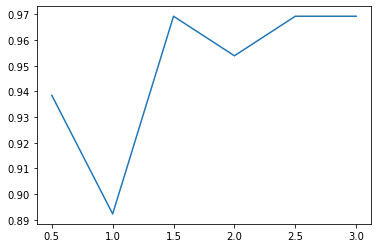

In [10]:
import matplotlib.pyplot as plt
#Plot of learning rates to Test accuracy
plt.plot(learning_rates, testAcc)